In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.5570 (42.9378, 45.1829) (43.3421, 45.2000)  1.8579 (Jnode 202)\n',
 't_n104        30.3694 (27.1393, 32.7984) (27.4058, 32.9640)  5.5581 (Jnode 201)\n',
 't_n105        29.5326 (26.3601, 31.9707) (26.6990, 32.2153)  5.5163 (Jnode 200)\n',
 't_n106        26.7446 (23.8256, 29.2167) (23.9936, 29.3524)  5.3588 (Jnode 199)\n',
 't_n107        26.0479 (23.2070, 28.5157) (23.4217, 28.6837)  5.2620 (Jnode 198)\n',
 't_n108        24.6709 (21.9595, 27.1159) (22.0433, 27.1841)  5.1408 (Jnode 197)\n',
 't_n109        12.4481 (11.1961, 14.3532) (11.1013, 14.1743)  3.0729 (Jnode 196)\n',
 't_n110        12.3437 (11.1099, 14.2388) (11.0226, 14.0657)  3.0431 (Jnode 195)\n',
 't_n111        12.0014 (10.8118, 13.8535) (10.7117, 13.6539)  2.9422 (Jnode 194)\n',
 't_n112        11.5807 (10.4389, 13.3656) (10.3308, 13.1838)  2.8530 (Jnode 193)\n',
 't_n113        11.0092 ( 9.9485, 12.7000) ( 9.8093, 12.4860)  2.6767 (Jnode 192)\n',
 't_n114         7.4719 ( 6.5348,  8.7716) ( 6.4223,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.557,
 30.3694,
 29.5326,
 26.7446,
 26.0479,
 24.6709,
 12.4481,
 12.3437,
 12.0014,
 11.5807,
 11.0092,
 7.4719,
 4.3751,
 2.511,
 2.1278,
 8.2868,
 7.11,
 11.4973,
 7.2019,
 11.0452,
 8.8215,
 7.1695,
 5.9452,
 10.7495,
 10.1455,
 2.8203,
 11.8732,
 10.7745,
 8.3581,
 6.7115,
 7.3615,
 6.6977,
 5.5986,
 5.4373,
 23.1653,
 18.7406,
 24.961,
 23.0038,
 21.5407,
 17.9762,
 9.6101,
 17.2896,
 15.2074,
 13.5218,
 11.5516,
 21.0216,
 19.461,
 5.3306,
 2.4193,
 27.9991,
 26.5469,
 24.2343,
 23.4448,
 25.1542,
 17.4361,
 21.118,
 17.0251,
 29.5826,
 27.9615,
 25.6379,
 24.3439,
 20.8562,
 13.8217,
 18.6039,
 25.2712,
 8.1759,
 25.4811,
 35.4299,
 34.688,
 34.0759,
 32.6663,
 30.2792,
 28.9875,
 27.9939,
 26.8029,
 23.9585,
 20.8378,
 17.4663,
 24.32,
 22.9629,
 18.3424,
 20.7519,
 26.3264,
 24.3075,
 22.4875,
 19.2583,
 13.2534,
 24.868,
 22.3404,
 19.7582,
 28.8968,
 27.4917,
 26.1408,
 23.2324,
 17.2064,
 25.9025,
 17.8047,
 14.5074,
 5.8273,
 34.4618,
 30.1841]

In [7]:
lower_ci_iqtree

[5.1829,
 2.7984,
 1.9707,
 9.2167,
 8.5157,
 7.1159,
 4.3532,
 4.2388,
 3.8535,
 3.3656,
 0.9485,
 0.5348,
 0.2083,
 0.3515,
 0.3917,
 0.0961,
 0.9329,
 3.2722,
 0.8167,
 0.9316,
 0.6376,
 0.9318,
 0.4961,
 0.5153,
 0.9358,
 0.7335,
 3.7025,
 0.5768,
 0.0121,
 0.3642,
 0.1958,
 0.5744,
 0.5606,
 0.9142,
 5.676,
 1.8243,
 7.428,
 5.5494,
 4.1657,
 0.8918,
 0.3424,
 0.3746,
 8.4052,
 6.7173,
 0.6456,
 3.7336,
 2.382,
 0.5286,
 0.04,
 0.4889,
 9.1721,
 7.2047,
 6.6119,
 7.9079,
 1.4483,
 4.4026,
 0.7953,
 2.0518,
 0.5071,
 8.3791,
 7.2046,
 4.0688,
 8.2779,
 2.0042,
 8.21,
 0.5268,
 8.5521,
 7.0859,
 6.1278,
 5.3816,
 3.7336,
 1.5504,
 0.4176,
 9.5325,
 8.4686,
 6.0515,
 3.3569,
 0.4508,
 6.3323,
 5.1318,
 1.2354,
 3.2619,
 8.0629,
 6.3049,
 4.7759,
 2.0166,
 7.0608,
 6.7911,
 4.6445,
 2.4657,
 0.3617,
 9.1759,
 8.0685,
 5.7905,
 0.8077,
 7.9984,
 1.3143,
 8.1853,
 0.2744,
 6.2571,
 2.5717]

In [8]:
upper_ci_iqtree

[43.3421,
 27.4058,
 26.699,
 23.9936,
 23.4217,
 22.0433,
 11.1013,
 11.0226,
 10.7117,
 10.3308,
 12.7,
 8.7716,
 4.8371,
 2.7151,
 2.9848,
 9.7543,
 8.466,
 10.2162,
 9.0314,
 12.7565,
 10.3267,
 8.5522,
 7.7046,
 12.5238,
 11.8807,
 4.2274,
 10.5057,
 12.4268,
 9.8371,
 8.1076,
 8.327,
 7.6775,
 6.5996,
 7.4353,
 20.4645,
 15.417,
 22.3268,
 20.4023,
 18.8057,
 14.9032,
 13.0628,
 14.0572,
 11.8874,
 10.4379,
 14.6486,
 18.2527,
 16.4612,
 8.2584,
 4.2435,
 25.031,
 23.6319,
 21.0232,
 20.0397,
 21.9678,
 12.3177,
 17.4374,
 12.6668,
 26.6559,
 25.0218,
 22.6351,
 21.1968,
 17.6655,
 10.2226,
 15.2134,
 22.1178,
 12.7545,
 22.0752,
 34.1624,
 33.6297,
 33.1472,
 32.26,
 28.891,
 27.3425,
 26.2945,
 24.9507,
 21.6172,
 18.0033,
 14.058,
 22.1057,
 20.5576,
 15.1073,
 18.1052,
 24.3952,
 22.1149,
 20.1525,
 16.5973,
 10.2558,
 22.732,
 19.9121,
 16.9784,
 27.2538,
 25.5089,
 23.8411,
 20.3058,
 12.6115,
 23.3937,
 14.1828,
 10.7874,
 8.6458,
 32.7199,
 27.1431]

In [9]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

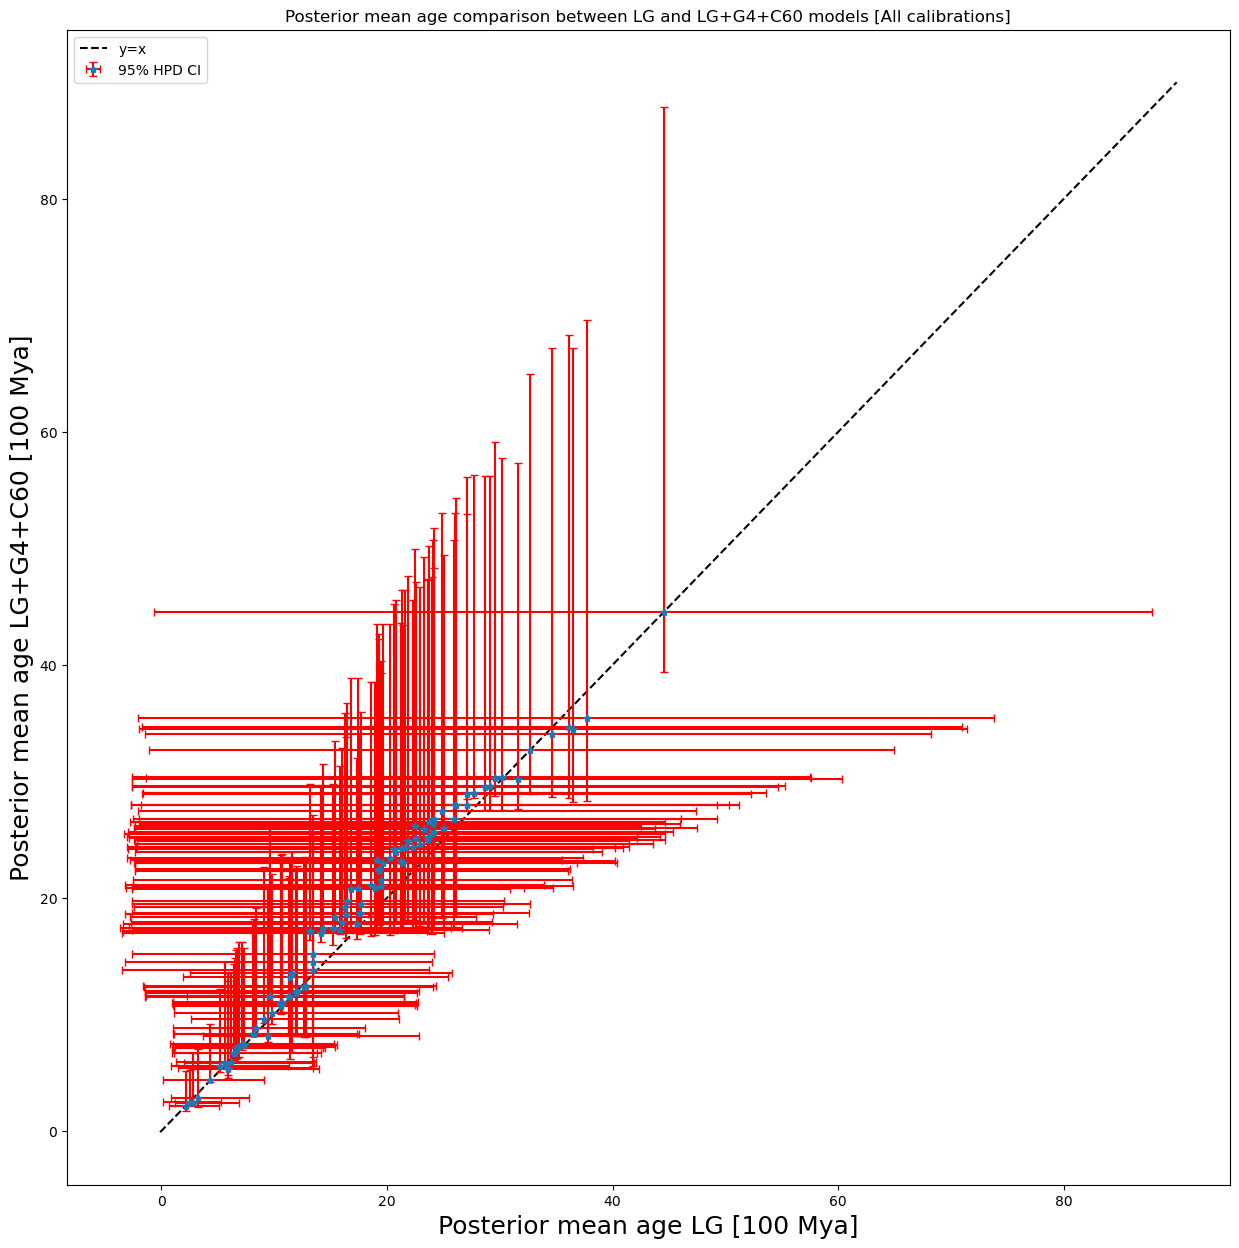

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,90], 
        [-0.1, 90], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all.png')

In [11]:
posterior_mean_baseml

[44.5419,
 30.1968,
 28.7294,
 25.9738,
 25.0315,
 22.9717,
 12.8445,
 12.6671,
 12.0081,
 11.3271,
 10.6247,
 7.1656,
 4.3586,
 2.5319,
 2.2311,
 8.0947,
 6.6379,
 11.3156,
 6.9303,
 10.7008,
 8.4111,
 6.6862,
 6.1684,
 10.6302,
 9.8206,
 3.2392,
 11.9333,
 10.5796,
 8.1907,
 6.495,
 7.3147,
 6.4245,
 5.1869,
 5.9575,
 21.267,
 17.5896,
 23.6037,
 21.3943,
 19.4631,
 16.0143,
 9.0777,
 15.8382,
 13.4635,
 11.6266,
 9.5965,
 19.4896,
 17.6895,
 5.8954,
 2.7775,
 26.0222,
 23.7456,
 20.6398,
 20.2357,
 22.5526,
 15.2451,
 18.5812,
 14.1638,
 29.148,
 27.1185,
 24.2179,
 22.2782,
 18.9631,
 13.422,
 16.3417,
 23.6828,
 9.4609,
 24.0399,
 37.7588,
 36.1424,
 34.6238,
 32.6819,
 29.5544,
 27.7356,
 26.1239,
 24.1326,
 20.7755,
 17.4522,
 14.3625,
 21.3161,
 19.6761,
 15.3737,
 16.7852,
 24.0488,
 21.5777,
 19.2812,
 16.2978,
 11.4443,
 21.8303,
 19.2901,
 16.4951,
 27.134,
 24.8478,
 22.5103,
 19.1499,
 13.2268,
 23.2594,
 17.3733,
 13.4562,
 5.6095,
 36.5244,
 31.6025]

In [12]:
posterior_mean_iqtree

[44.557,
 30.3694,
 29.5326,
 26.7446,
 26.0479,
 24.6709,
 12.4481,
 12.3437,
 12.0014,
 11.5807,
 11.0092,
 7.4719,
 4.3751,
 2.511,
 2.1278,
 8.2868,
 7.11,
 11.4973,
 7.2019,
 11.0452,
 8.8215,
 7.1695,
 5.9452,
 10.7495,
 10.1455,
 2.8203,
 11.8732,
 10.7745,
 8.3581,
 6.7115,
 7.3615,
 6.6977,
 5.5986,
 5.4373,
 23.1653,
 18.7406,
 24.961,
 23.0038,
 21.5407,
 17.9762,
 9.6101,
 17.2896,
 15.2074,
 13.5218,
 11.5516,
 21.0216,
 19.461,
 5.3306,
 2.4193,
 27.9991,
 26.5469,
 24.2343,
 23.4448,
 25.1542,
 17.4361,
 21.118,
 17.0251,
 29.5826,
 27.9615,
 25.6379,
 24.3439,
 20.8562,
 13.8217,
 18.6039,
 25.2712,
 8.1759,
 25.4811,
 35.4299,
 34.688,
 34.0759,
 32.6663,
 30.2792,
 28.9875,
 27.9939,
 26.8029,
 23.9585,
 20.8378,
 17.4663,
 24.32,
 22.9629,
 18.3424,
 20.7519,
 26.3264,
 24.3075,
 22.4875,
 19.2583,
 13.2534,
 24.868,
 22.3404,
 19.7582,
 28.8968,
 27.4917,
 26.1408,
 23.2324,
 17.2064,
 25.9025,
 17.8047,
 14.5074,
 5.8273,
 34.4618,
 30.1841]

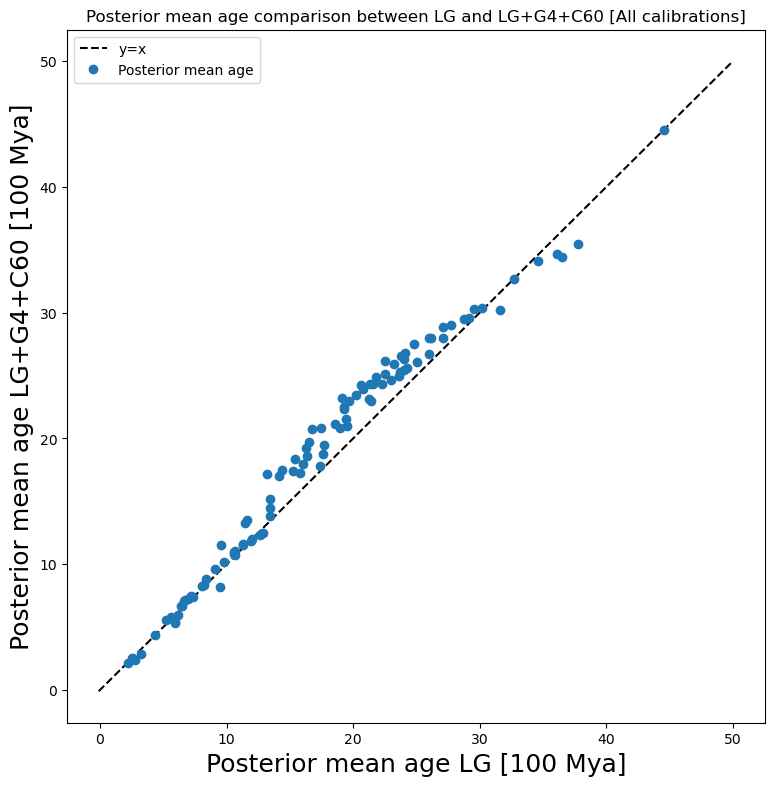

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all_scatter.png')

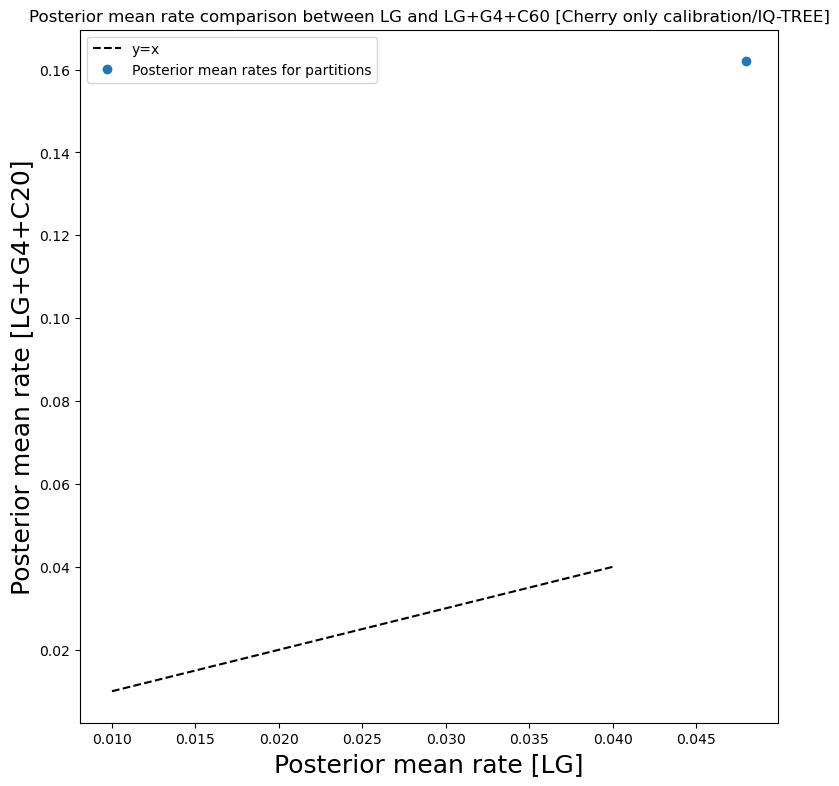

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')